QObject::moveToThread: Current thread (0x3006b90) is not the object's thread (0x320fd60).
Cannot move to target thread (0x3006b90)

QObject::moveToThread: Current thread (0x3006b90) is not the object's thread (0x320fd60).
Cannot move to target thread (0x3006b90)

QObject::moveToThread: Current thread (0x3006b90) is not the object's thread (0x320fd60).
Cannot move to target thread (0x3006b90)

QObject::moveToThread: Current thread (0x3006b90) is not the object's thread (0x320fd60).
Cannot move to target thread (0x3006b90)

QObject::moveToThread: Current thread (0x3006b90) is not the object's thread (0x320fd60).
Cannot move to target thread (0x3006b90)

QObject::moveToThread: Current thread (0x3006b90) is not the object's thread (0x320fd60).
Cannot move to target thread (0x3006b90)

QObject::moveToThread: Current thread (0x3006b90) is not the object's thread (0x320fd60).
Cannot move to target thread (0x3006b90)

QObject::moveToThread: Current thread (0x3006b90) is not the object's thread

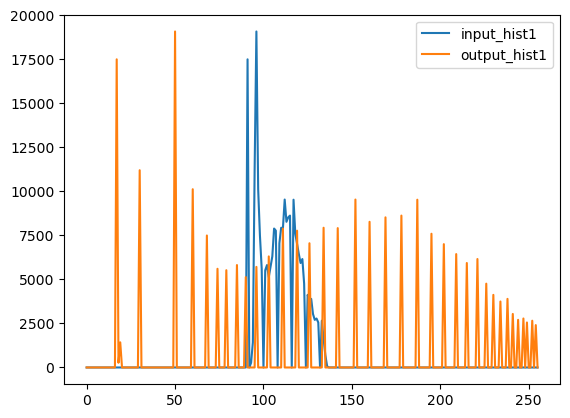

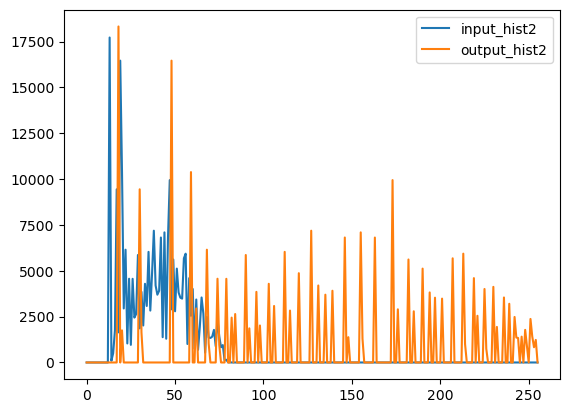

In [25]:
#不能调用numpy，根据原理写
#功能：直方图均衡化
import cv2
import numpy as np
import matplotlib.pyplot as plt
'''
输入：灰度图像
输出：直方图均衡化后的图像，输出图像的直方图，输入图像的直方图

'''
input_image = cv2.imread('Q3_1_1.tif',cv2.IMREAD_GRAYSCALE)
def hist_equ_12210634(input_image):
    """ 
    Perform histogram equalization on the input image.
    
    Parameters:
    input_image (numpy.ndarray): The input grayscale image to be processed.
    
    Returns:
    tuple: A tuple containing the output image after histogram equalization,
           the histogram of the output image, and the histogram of the input image.
    """
    input_hist = np.zeros((256,1)).astype(np.int32)
    img_flat = input_image.flatten()
    for i in range(256):
        input_hist[i] = np.sum(img_flat == i)
    
    p_hist = input_hist / np.sum(input_hist)
    
    cdf = np.cumsum(p_hist)
    T = 255 * cdf
    
    output_image = T[input_image].astype(np.uint8)
   
    output_hist = np.zeros((256,1)).astype(np.int32)
    img_flat = output_image.flatten()
    for i in range(256):
        output_hist[i] = np.sum(img_flat == i)

    return (output_image,output_hist,input_hist)

img1 = cv2.imread('Q3_1_1.tif',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('Q3_1_2.tif',cv2.IMREAD_GRAYSCALE)
output_image1,output_hist1,input_hist1 = hist_equ_12210634(img1)
output_image2,output_hist2,input_hist2 = hist_equ_12210634(img2)
cv2.imshow('input_image1',img1)
cv2.imshow('input_image2',img2)
cv2.imshow('output_image1',output_image1)
cv2.imshow('output_image2',output_image2)
plt.plot(input_hist1,label='input_hist1')
plt.plot(output_hist1,label='output_hist1')
plt.legend()
plt.show()
plt.plot(input_hist2,label='input_hist2')
plt.plot(output_hist2,label='output_hist2')
plt.legend()
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

/tmp/ipykernel_7738/3900041086.py:33: RuntimeWarning: overflow encountered in scalar subtract
  if abs(G[zi]-T[pi])<abs(G[zi-1]-T[pi]):


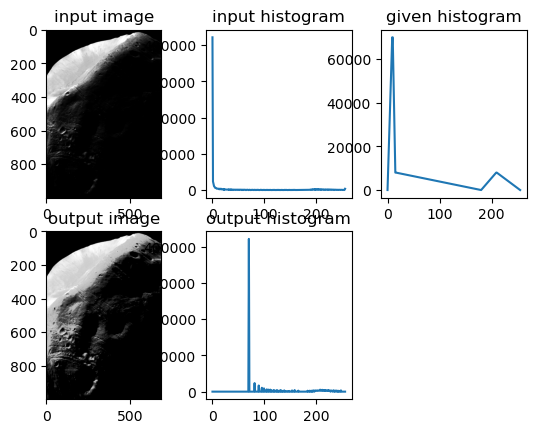

In [26]:
#直方图matching
# def hist_match_12210634(input_image,spec_hist):
#     return (output_image,output_hist,input_hist)
spec_hist = np.hstack((np.linspace(0,7e4,10),np.linspace(7e4,0.8e4,6),np.linspace(0.8e4,0,180-16),np.linspace(0,0.8e4,210-180),np.linspace(0.8e4,0,256-210)))




def hist_match_12210634(input_image,spec_hist):
    #计算输入图像的直方图
    input_hist = np.zeros((256,1)).astype(np.int32)
    img_flat = input_image.flatten()
    for i in range(256):
        input_hist[i] = np.sum(img_flat == i)

    #计算概率，累积分布，映射函数T
    p_hist = input_hist / np.sum(input_hist)
    p_cdf = np.cumsum(p_hist)
    T = (255 * p_cdf).astype(np.uint8)

    #根据给定直方图，计算映射函数G
    p_z = spec_hist / np.sum(spec_hist)
    z_cdf = np.cumsum(p_z)
    G = (255 * z_cdf).astype(np.uint8)

    #直接构造最终映射函数
    mapping = np.zeros(256,dtype=np.uint8)
    zi=0
    for pi in range(256):
        #找到T[pi]在G中最接近的位置，然后取该位置的值作为映射函数值
        while zi<256 and G[zi]<T[pi]:
            zi+=1
        if abs(G[zi]-T[pi])<abs(G[zi-1]-T[pi]):
            mapping[pi]=zi
        else:
            mapping[pi]=max(0,zi-1)

    output_image = mapping[input_image]

    #计算输出图像的直方图
    output_hist = np.zeros((256,1)).astype(np.int32)
    img_flat = output_image.flatten()
    for i in range(256):
        output_hist[i] = np.sum(img_flat == i)
    return (output_image,output_hist,input_hist)



    # #计算映射函数的反函数
    # G_inverse = np.zeros((256,1))
    
    # rG = []
    # for i in range(256):
    #     indics = np.where(G==i)[0]
    #     if indics.size > 0:
    #         indics = np.where(G==i)[0]
    #         #一对多映射则取最小值
    #         G_inverse[i]=indics[indics.size//2]
    #         G_inverse[i]=indics[0]
    #         rG.append(i)
    # #对于没有出现在映射函数中的值，使用线性插值
    # for ri in range(len(rG)-1):
    #     left_index= rG[ri]
    #     right_index = rG[ri+1]
    #     interp = np.linspace(G_inverse[left_index],G_inverse[right_index],right_index-left_index+1)
    #     G_inverse[left_index+1:right_index] = interp[1:-1]
    # G_inverse = np.round(G_inverse).astype(np.uint8).flatten()

    

img3_2= cv2.imread('Q3_2.tif', cv2.IMREAD_GRAYSCALE)
output_image,output_hist,input_hist = hist_match_12210634(img3_2,spec_hist)

#输入图像，输出图像，各自直方图，和给定直方图
plt.subplot(2,3,1)
plt.imshow(img3_2,cmap='gray')
plt.title('input image')
plt.subplot(2,3,2)
plt.plot(input_hist)
plt.title('input histogram')
plt.subplot(2,3,3)
plt.plot(spec_hist)
plt.title('given histogram')
plt.subplot(2,3,4)
plt.imshow(output_image,cmap='gray')
plt.title('output image')
plt.subplot(2,3,5)
plt.plot(output_hist)
plt.title('output histogram')
plt.show()
        


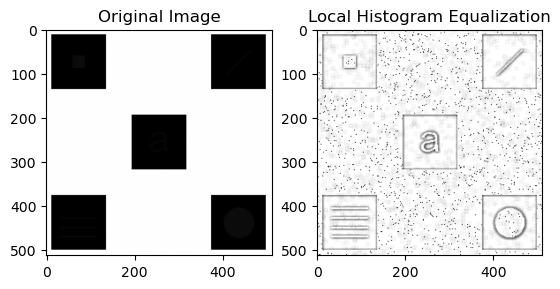

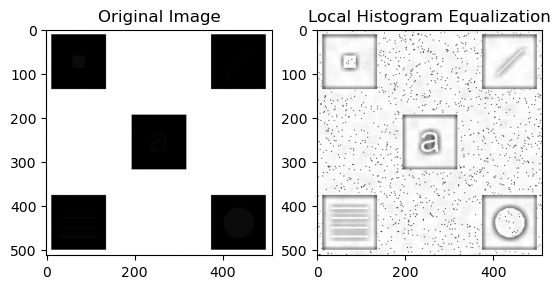

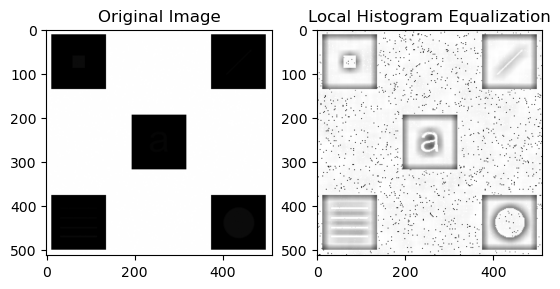

In [23]:
#局部直方图处理
# def local_hist_equ_12210634(input_img,m_size):

def local_hist_equ_12210634(input_img,m_size):
    #获取inputhist
# m_size = 3
# input_img = cv2.imread('Q3_3.tif',0)
    input_hist = np.zeros((256,1)).astype(np.int32)
    img_flat = input_image.flatten()
    for i in range(256):
        input_hist[i] = np.sum(img_flat == i)

    # ws = m_size
    pd = m_size//2
    output_image = np.zeros(input_img.shape)
    img_pad = np.pad(input_img,((pd,pd),(pd,pd)),'symmetric')

    for i in range(input_img.shape[0]):
        for j in range(input_img.shape[1]):
            patch = img_pad[i:i+m_size,j:j+m_size]
            #局部直方图均衡化
            # output_image[i-pd:i+pd+1,j-pd:j+pd+1],_,_ = hist_equ_12210634(patch)
            hist,_ = np.histogram(patch.flatten(),256,[0,256])
            cdf = hist.cumsum()
            T = 255*cdf/cdf[-1]
            T = np.round(T).astype(np.uint8)
            output_image[i,j] = T[patch[pd,pd]]
    #获取outputhist
    output_hist = np.zeros((256,1)).astype(np.int32)
    img_flat = output_image.flatten()
    for i in range(256):
        output_hist[i] = np.sum(img_flat == i)
    return (output_image,output_hist,input_hist)

for m_size in [10,20,30]:
    img3_3 = cv2.imread('Q3_3.tif',0)
    
    output_image3,output_hist3,input_hist3 = local_hist_equ_12210634(img3_3,m_size)


    #展示结果
    plt.subplot(1,2,1)
    plt.imshow(img3_3,cmap='gray')
    plt.title('Original Image')
    plt.subplot(1,2,2)
    plt.imshow(output_image3,cmap='gray')
    plt.title('Local Histogram Equalization')
    plt.show()
    #保存图片
    cv2.imwrite('Q3_3_local_hist_equ-'+str(m_size)+'.tif',output_image3)

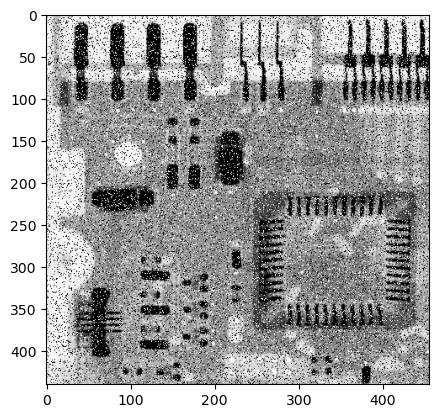

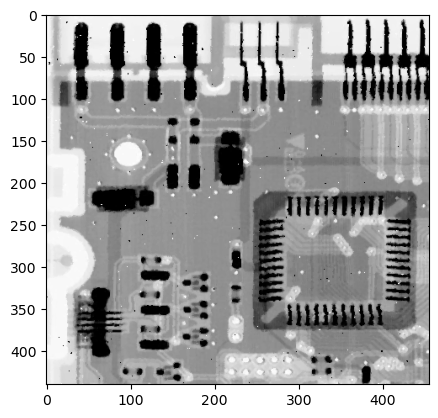

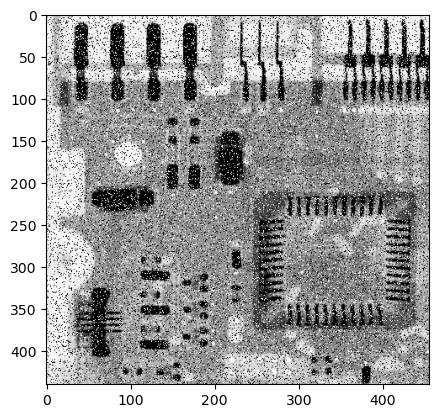

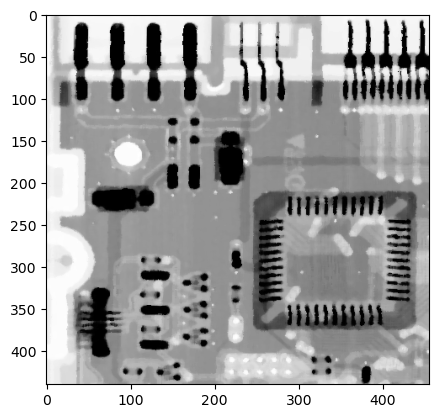

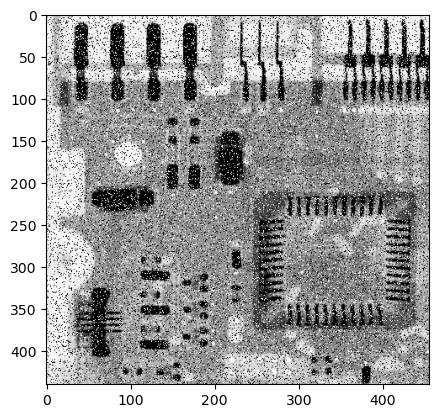

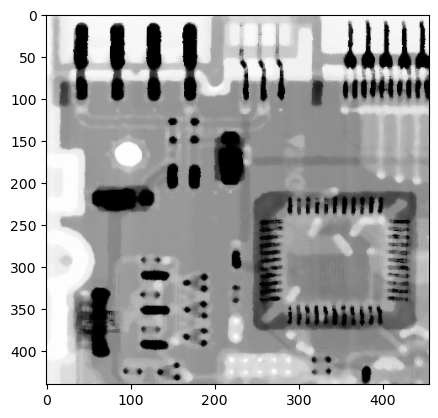

In [22]:
#椒盐噪声，采用滤波处理
def reduce_SAP_12210634(input_img, n_size):
    #1.制造终值滤波卷积核
    # kernel = np.ones((n_size, n_size)) / (n_size ** 2)
    #2.进行滤波
    height = input_img.shape[0]
    width = input_img.shape[1]
    output_img = np.zeros((height, width))
    img_pad = np.pad(input_img, (n_size//2, n_size//2), 'edge')
    for i in range(height):
        for j in range(width):
            #中值滤波
            output_img[i, j] = np.median(img_pad[i:i+n_size, j:j+n_size])
            # output_img[i, j] = (img_pad[i:i+n_size, j:j+n_size] * kernel).sum()
    #3.返回滤波后的图像
    return output_img
#测试
input_img = cv2.imread('Q3_4.tif', cv2.IMREAD_GRAYSCALE)
for n_size in [3, 5, 7]:
    output_img = reduce_SAP_12210634(input_img, n_size)
    cv2.imwrite('Q3_4_filtered_{}.tif'.format(n_size), output_img)
    
   
    #显示原始图像
    plt.imshow(input_img, cmap='gray')
    plt.show()
    #显示滤波后的图像
    plt.imshow(output_img, cmap='gray')
    plt.show()